In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import butter, lfilter

In [2]:
#Read data from CSV datafile
dataset = pd.read_excel("data.xlsx", usecols=[0,1]) 
array_data = np.array(dataset);
array_data = array_data[:30000]

In [3]:
#x is time, y is RED
x = np.array([i*0.02 for i in range(0,30000)]);
y = array_data[:,1];

In [4]:
#Functions for Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [23]:
#Filter RED data for Heart Rate (0.5-2 Hz)
y_HR = butter_bandpass_filter(y[:], 0.3, 1.4, 50, order=5)

In [24]:
from scipy.signal import argrelmax, argrelextrema

#Finding the index of peaks for heart rate
peakindex_HR = argrelextrema(y_HR, np.greater)

#Storing the peaks and corresponding times for Heart rate
peaks_HR = [y_HR[i] for i in peakindex_HR]
time_HR = [x[i] for i in peakindex_HR]

In [55]:
#Calculating denominators for Heart Rate formula - distance between two peaks
HR_diff = [peakindex_HR[0][i+1] - peakindex_HR[0][i] for i in range(len(peakindex_HR[0])-1)]
#print HR_diff

#Calculating heart rate
HR_array = []
for i in HR_diff:
    HR_array.append(3000.0/i);    #Instantaneous Heart rate

print "Average Heart Rate: ", np.around(np.mean(HR_array[2:]),4)

HR_range = [elem for elem in np.array(HR_array) if elem > 50 and elem<100]
print "Instantaneous Heart Rate"
#print '\n'.join('{}'.format(item,4) for item in HR_range)
print "Percentage of data considered: ",100*float(len(HR_range))/len(HR_array)
print "Average of range considered: ",np.mean(HR_range)

Average Heart Rate:  72.571
Instantaneous Heart Rate
65.2173913043
62.5
76.9230769231
71.4285714286
53.5714285714
62.5
90.9090909091
90.9090909091
90.9090909091
56.6037735849
60.0
55.5555555556
85.7142857143
81.0810810811
71.4285714286
93.75
69.7674418605
83.3333333333
62.5
68.1818181818
60.0
93.75
63.829787234
85.7142857143
60.0
69.7674418605
61.2244897959
90.9090909091
75.0
83.3333333333
69.7674418605
83.3333333333
71.4285714286
90.9090909091
78.9473684211
78.9473684211
76.9230769231
73.1707317073
83.3333333333
73.1707317073
78.9473684211
71.4285714286
83.3333333333
75.0
66.6666666667
88.2352941176
83.3333333333
73.1707317073
63.829787234
69.7674418605
93.75
69.7674418605
96.7741935484
85.7142857143
81.0810810811
71.4285714286
55.5555555556
56.6037735849
57.6923076923
63.829787234
62.5
60.0
75.0
71.4285714286
69.7674418605
73.1707317073
62.5
76.9230769231
69.7674418605
61.2244897959
81.0810810811
68.1818181818
56.6037735849
65.2173913043
68.1818181818
75.0
62.5
69.7674418605
78.94736

In [56]:
#Filtering for Respiration rate
y_R = butter_bandpass_filter(y[:], 0.2, 0.5, 50, order=5)

#Finding index of peaks for Respiration rate
peakindex_R = argrelextrema(y_R, np.greater)

#Finding peaks and corresponding times for Respiration rate
peaks_R = [y_R[i] for i in peakindex_R]
time_R = [x[i] for i in peakindex_R]

In [58]:
#print time_R

#Finding respiration rate
R_array = []
R_diff = [time_R[0][i+1] - time_R[0][i] for i in range(len(time_R[0])-1)]
for i in R_diff:
    R_array.append(60/i)    #Instantaneous

print "Instantaneous Respiration Rate: "  
#print '\n'.join('{}'.format(item,4) for item in R_array[1:])

#Average
print "Average respiration rate: ", np.around(np.mean(R_array[1:]),4)

Instantaneous Respiration Rate: 
16.6666666667
17.5438596491
17.1428571429
17.2413793103
17.2413793103
17.1428571429
17.1428571429
17.1428571429
17.2413793103
17.2413793103
16.9491525424
17.3410404624
17.2413793103
17.0454545455
17.1428571429
17.1428571429
17.0454545455
17.3410404624
17.1428571429
17.1428571429
17.2413793103
16.8539325843
16.9491525424
17.4418604651
16.9491525424
17.3410404624
17.0454545455
17.1428571429
17.4418604651
17.1428571429
16.6666666667
17.3410404624
17.4418604651
17.2413793103
17.4418604651
17.2413793103
17.1428571429
17.0454545455
17.1428571429
17.2413793103
17.4418604651
17.0454545455
17.0454545455
17.3410404624
17.2413793103
17.3410404624
17.3410404624
17.4418604651
17.1428571429
17.0454545455
17.5438596491
17.0454545455
17.3410404624
17.2413793103
17.2413793103
16.8539325843
17.4418604651
17.0454545455
17.2413793103
17.3410404624
17.5438596491
17.3410404624
16.8539325843
17.2413793103
17.4418604651
17.1428571429
17.3410404624
17.3410404624
17.1428571429
1

In [48]:
#SPO2 calculation

#Already calculated max peaks for RED (peaks_HR, time_HR)
#Applying filter
upper = 1.6
order = 2
y_RED = butter_bandpass_filter(y[:], 0.001, upper, 50, order)

#Finding index of peaks for RED
peakindex_RED = argrelextrema(y_RED, np.greater)

#Calculating peaks and corresponding times for RED
peaks_RED = [y_RED[i] for i in peakindex_RED]
time_RED = [x[i] for i in peakindex_RED]

#Finding min peaks index for RED
peakindex_RED_min = argrelextrema(y_RED, np.less)
peaks_RED_min = [y_RED[i] for i in peakindex_RED_min]
time_RED_min = [x[i] for i in peakindex_RED_min]

In [49]:
#Interpolating min peaks for RED to find DC at time_HR
DC_RED = np.interp(time_RED[0], time_RED_min[0], peaks_RED_min[0])

#Calculating AC for RED values
AC_RED = peaks_RED[0] - DC_RED

In [50]:
#z is IR values
z = array_data[:,0];

#Applying filter
z_IR = butter_bandpass_filter(z[:], 0.001, upper, 50, order)

#Finding index of peaks for IR
peakindex_IR = argrelextrema(z_IR, np.greater)

#Calculating peaks and corresponding times for IR
peaks_IR = [z_IR[i] for i in peakindex_IR]
time_IR = [x[i] for i in peakindex_IR]

#Finding index of min peaks for IR
peakindex_IR_min = argrelextrema(z_IR, np.less)

#Finding peaks and corresponding times for min IR peaks
peaks_IR_min = [z_IR[i] for i in peakindex_IR_min]
time_IR_min = [x[i] for i in peakindex_IR_min]

In [51]:
#Interpolating min peaks for RED to find DC at time_IR
DC_IR = np.interp(time_IR[0], time_IR_min[0], peaks_IR_min[0])

#Calculating AC for IR values
AC_IR = peaks_IR[0] - DC_IR

In [52]:
#Calculating ratio average
#Finding if RED/ IR has lesser number of peaks
length = 0
if len(AC_RED) < len(DC_IR):
    length = len(AC_RED)
else:
    length = len(DC_IR)
        
num = AC_RED[0:length]*DC_IR[0:length]
den = AC_IR[0:length]*DC_RED[0:length]

ratio_avg = num/den
#ratio_avg = den/num

In [59]:
spo2 = -45.060*ratio_avg*ratio_avg+30.354*ratio_avg+94.845

spo2_range = [elem for elem in np.array(spo2) if elem > 90 and elem < 100]
print "Instantanoues SPO2: "
#print '\n'.join('{}'.format(item,4) for item in spo2_range)
print "Percentage of data considered: ",100*float(len(spo2_range))/len(spo2)
print "Average of SPO2 considered: ",np.mean(spo2_range)

Instantanoues SPO2: 
92.037412627
93.3485900239
90.1570790208
92.9666635919
91.9190760673
94.7291134359
94.5694933407
94.429886696
94.3808273772
94.4139559455
94.9804612746
99.4403128034
96.9171804695
99.6453095999
95.1727659745
96.8090168293
97.768635733
99.7446707572
98.6593261722
99.2073939775
97.6198061766
95.1034657211
95.107344697
96.66962039
96.7944133849
96.6180186468
99.7925478493
99.9192835727
94.267197217
97.2246395126
98.1540181154
95.8013392761
95.0697338188
97.9139370241
98.2561173956
97.1576569523
95.5403794368
98.2072345128
98.2151792482
96.6367508219
98.8167622767
98.2411710711
99.669295501
95.5977854303
99.4453350995
95.1928110855
99.6832054288
99.5264672169
98.3013425047
97.7803230718
98.2757071588
97.1090118815
94.5811707725
99.8584478581
99.2585298272
99.6908537728
99.7865262998
95.1263944291
96.1905119443
90.7464435984
95.1730967574
99.6733520155
99.629734902
95.2761437786
97.568815154
98.6873229782
92.5504995367
98.3010027898
91.1183941826
95.5868734331
97.567305

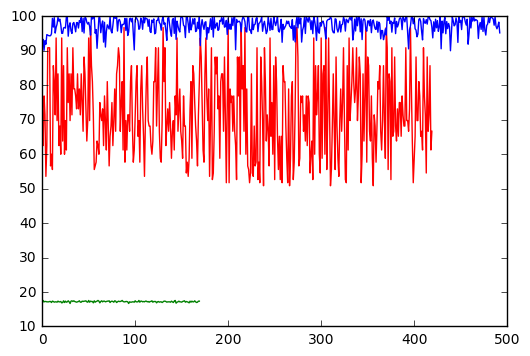

In [54]:
x_range = [i for i in range(len(HR_range))]
plt.plot(x_range, HR_range, 'r')

x_range = [i for i in range(len(R_array)-1)]
plt.plot(x_range, R_array[1:], 'g')

x_range = [i for i in range(len(spo2_range))]
plt.plot(x_range, spo2_range, 'b')

plt.show()